In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('flipkart_laptops.csv', header= 0,encoding= 'unicode_escape')

In [18]:
def remv_off(discount):
    trimmed_dis = discount.rstrip("% off")
    return float(trimmed_dis)
df['Discount']= df['Discount'].apply(remv_off) 

In [19]:
df

,Name,Brand,Selling Price,MRP,Discount,Ratings,No_of_ratings,Details
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Lenovo,36990,60890,39.0,4.2,670 Ratings & 54 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Lenovo,37990,59390,36.0,4.2,3803 Ratings & 362 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,ASUS,32990,45990,28.0,4.3,8727 Ratings & 876 Reviews,['Intel Core i3 Processor (10th Gen)' '8 GB DD...
3,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,realme,46990,54999,14.0,4.4,11894 Ratings & 1773 Reviews,['Stylish & Portable Thin and Light Laptop' '1...
4,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,38990,61202,36.0,4.3,65 Ratings & 6 Reviews,['Processor: Intel i3-1115G4 (Base- 1.70 GHz &...
...,...,...,...,...,...,...,...,...
409,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,45890,58567,21.0,4.3,406 Ratings & 36 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...
410,acer Swift 3 Core i5 11th Gen Intel EVO - (8 G...,acer,68500,72999,6.0,4.4,42 Ratings & 9 Reviews,['Intel Evo platform feat 11th Gen Intel Core ...
411,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,HP,90000,103215,12.0,4.6,289 Ratings & 40 Reviews,['AMD Ryzen 7 Octa Core Processor' '16 GB DDR4...
412,ASUS VivoBook Ultra 14 Core i3 11th Gen - (8 G...,ASUS,44490,56990,21.0,4.4,2807 Ratings & 401 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...


In [20]:
def get_num_ratings(rating_details):
    return float(rating_details.split()[0])
df['Ratings_num']=df['No_of_ratings'].apply(get_num_ratings)

In [21]:
df

,Name,Brand,Selling Price,MRP,Discount,Ratings,No_of_ratings,Details,Ratings_num
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Lenovo,36990,60890,39.0,4.2,670 Ratings & 54 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,670.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Lenovo,37990,59390,36.0,4.2,3803 Ratings & 362 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,3803.0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,ASUS,32990,45990,28.0,4.3,8727 Ratings & 876 Reviews,['Intel Core i3 Processor (10th Gen)' '8 GB DD...,8727.0
3,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,realme,46990,54999,14.0,4.4,11894 Ratings & 1773 Reviews,['Stylish & Portable Thin and Light Laptop' '1...,11894.0
4,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,38990,61202,36.0,4.3,65 Ratings & 6 Reviews,['Processor: Intel i3-1115G4 (Base- 1.70 GHz &...,65.0
...,...,...,...,...,...,...,...,...,...
409,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,45890,58567,21.0,4.3,406 Ratings & 36 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,406.0
410,acer Swift 3 Core i5 11th Gen Intel EVO - (8 G...,acer,68500,72999,6.0,4.4,42 Ratings & 9 Reviews,['Intel Evo platform feat 11th Gen Intel Core ...,42.0
411,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,HP,90000,103215,12.0,4.6,289 Ratings & 40 Reviews,['AMD Ryzen 7 Octa Core Processor' '16 GB DDR4...,289.0
412,ASUS VivoBook Ultra 14 Core i3 11th Gen - (8 G...,ASUS,44490,56990,21.0,4.4,2807 Ratings & 401 Reviews,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,2807.0


In [22]:
def get_num_ratings(rating_details):
    return float(rating_details.split()[3])
df['Reviews']=df['No_of_ratings'].apply(get_num_ratings)

In [23]:
df.drop(['No_of_ratings'],axis=1)

,Name,Brand,Selling Price,MRP,Discount,Ratings,Details,Ratings_num,Reviews
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Lenovo,36990,60890,39.0,4.2,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,670.0,54.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Lenovo,37990,59390,36.0,4.2,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,3803.0,362.0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,ASUS,32990,45990,28.0,4.3,['Intel Core i3 Processor (10th Gen)' '8 GB DD...,8727.0,876.0
3,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,realme,46990,54999,14.0,4.4,['Stylish & Portable Thin and Light Laptop' '1...,11894.0,1773.0
4,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,38990,61202,36.0,4.3,['Processor: Intel i3-1115G4 (Base- 1.70 GHz &...,65.0,6.0
...,...,...,...,...,...,...,...,...,...
409,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,45890,58567,21.0,4.3,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,406.0,36.0
410,acer Swift 3 Core i5 11th Gen Intel EVO - (8 G...,acer,68500,72999,6.0,4.4,['Intel Evo platform feat 11th Gen Intel Core ...,42.0,9.0
411,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,HP,90000,103215,12.0,4.6,['AMD Ryzen 7 Octa Core Processor' '16 GB DDR4...,289.0,40.0
412,ASUS VivoBook Ultra 14 Core i3 11th Gen - (8 G...,ASUS,44490,56990,21.0,4.4,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,2807.0,401.0


In [24]:
df=df.drop(['No_of_ratings'],axis=1)


In [25]:
df

,Name,Brand,Selling Price,MRP,Discount,Ratings,Details,Ratings_num,Reviews
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Lenovo,36990,60890,39.0,4.2,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,670.0,54.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,Lenovo,37990,59390,36.0,4.2,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,3803.0,362.0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,ASUS,32990,45990,28.0,4.3,['Intel Core i3 Processor (10th Gen)' '8 GB DD...,8727.0,876.0
3,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,realme,46990,54999,14.0,4.4,['Stylish & Portable Thin and Light Laptop' '1...,11894.0,1773.0
4,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,38990,61202,36.0,4.3,['Processor: Intel i3-1115G4 (Base- 1.70 GHz &...,65.0,6.0
...,...,...,...,...,...,...,...,...,...
409,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,DELL,45890,58567,21.0,4.3,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,406.0,36.0
410,acer Swift 3 Core i5 11th Gen Intel EVO - (8 G...,acer,68500,72999,6.0,4.4,['Intel Evo platform feat 11th Gen Intel Core ...,42.0,9.0
411,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,HP,90000,103215,12.0,4.6,['AMD Ryzen 7 Octa Core Processor' '16 GB DDR4...,289.0,40.0
412,ASUS VivoBook Ultra 14 Core i3 11th Gen - (8 G...,ASUS,44490,56990,21.0,4.4,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,2807.0,401.0


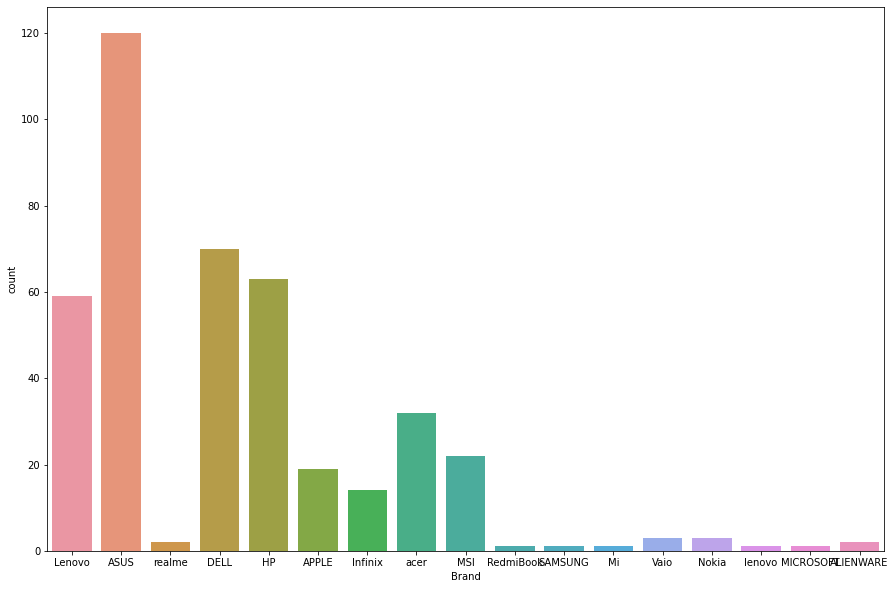

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x ='Brand', data = df)
plt.show()

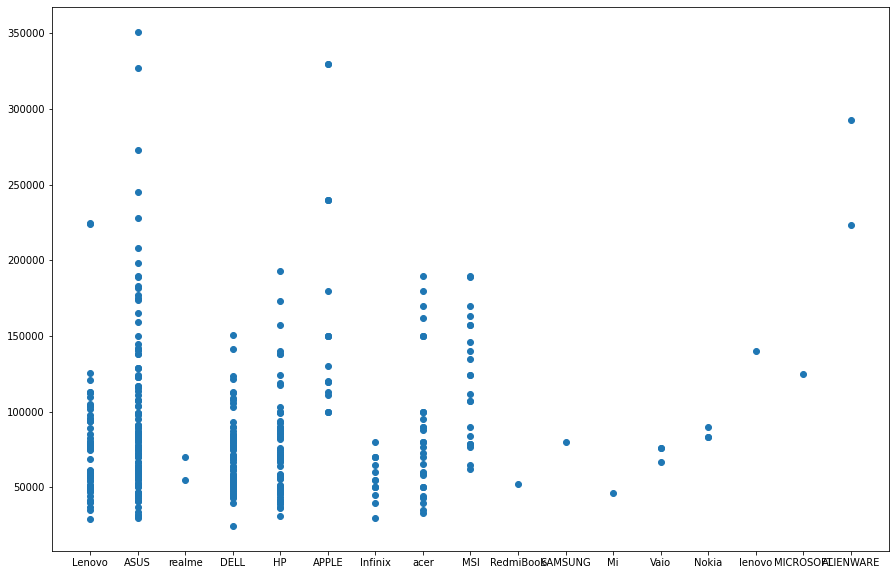

In [27]:
x=df.Brand
y=df.MRP
plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.show()

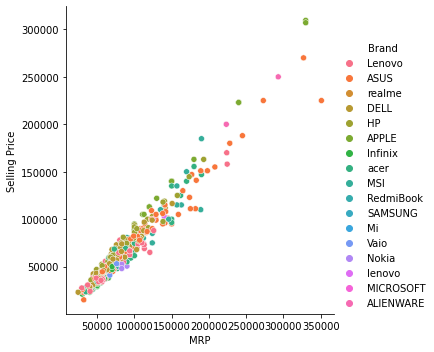

<Figure size 1080x720 with 0 Axes>

In [28]:
sns.relplot(x='MRP',y='Selling Price',data=df,hue='Brand')
plt.figure(figsize=(15,10))
plt.show()

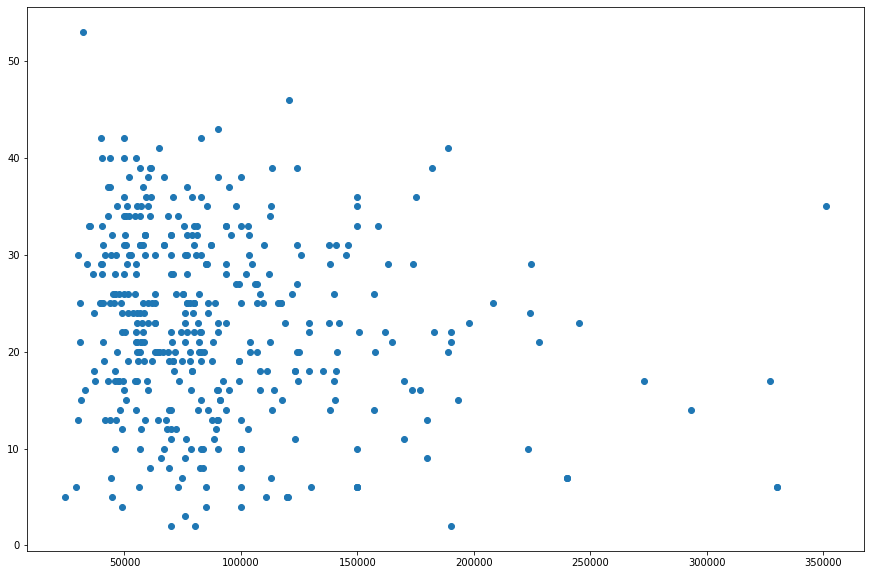

In [29]:
x=df.MRP
y=df.Discount
plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.show()

<Figure size 1440x1080 with 0 Axes>

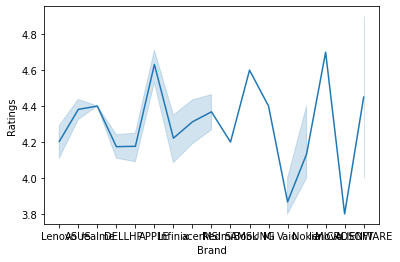

<Figure size 1440x1080 with 0 Axes>

In [30]:
sns.lineplot(x='Brand',y='Ratings',data=df)
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

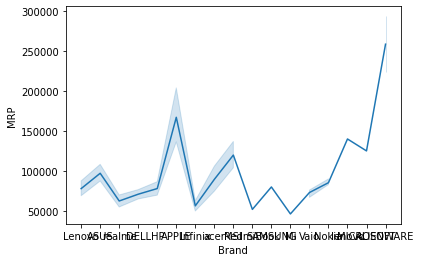

<Figure size 1440x1080 with 0 Axes>

In [31]:
sns.lineplot(x='Brand',y='MRP',data=df)
plt.figure(figsize=(20,15))

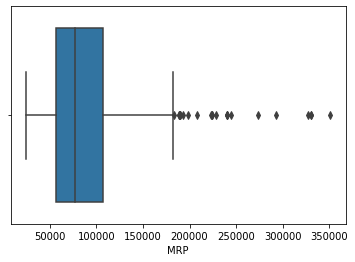

In [32]:
sns.boxplot(x=df['MRP'])

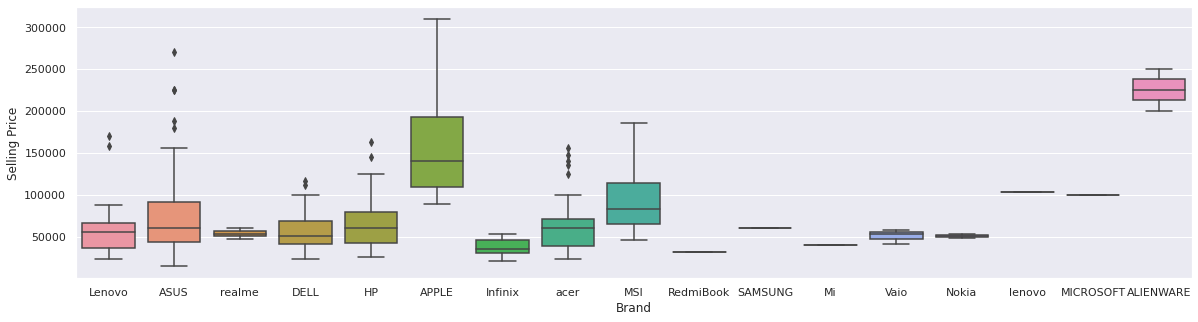

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(x='Brand',y='Selling Price',data=df)

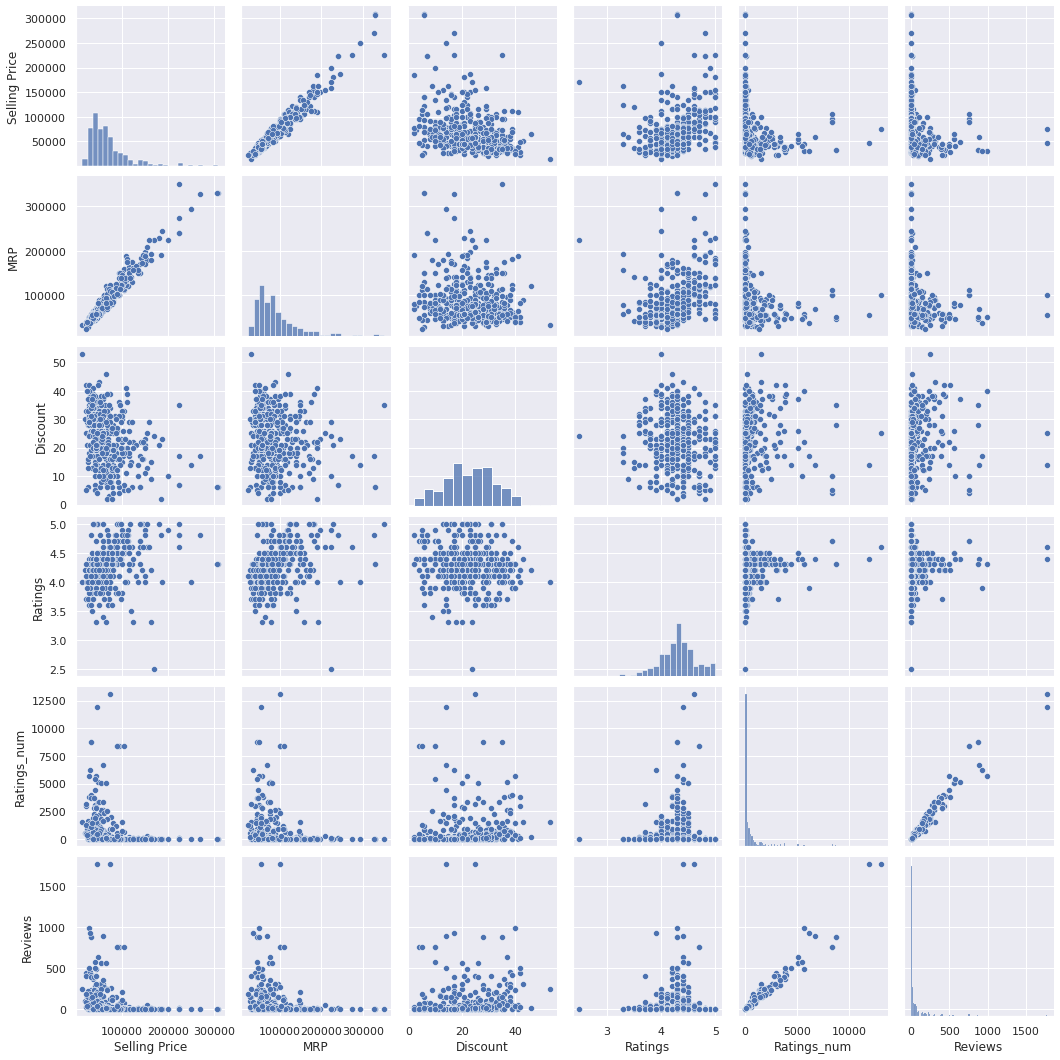

In [34]:
sns.pairplot(df)

<Figure size 1440x1080 with 0 Axes>

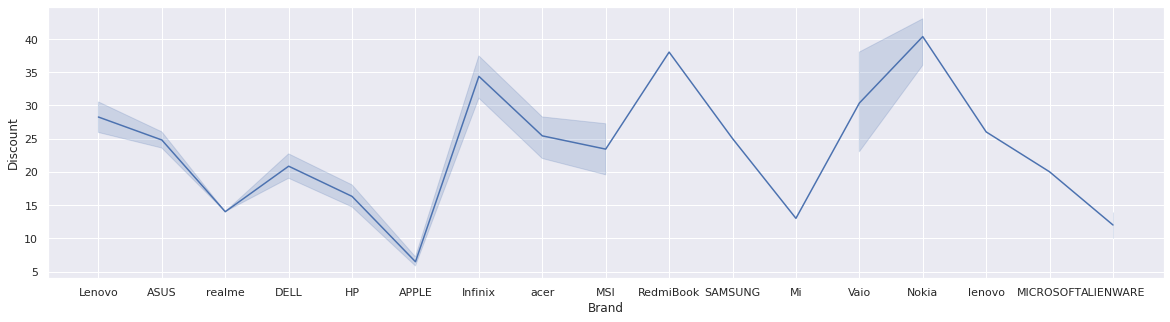

<Figure size 1440x1080 with 0 Axes>

In [35]:
sns.lineplot(x='Brand',y='Discount',data=df)
plt.figure(figsize=(20,15))


In [36]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Brand']= label_encoder.fit_transform(df['Brand'])
  
df['Brand'].unique()

array([ 6,  2, 16,  3,  4,  1,  5, 14,  8, 11, 12,  9, 13, 10, 15,  7,  0])

In [37]:
df

,Name,Brand,Selling Price,MRP,Discount,Ratings,Details,Ratings_num,Reviews
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,6,36990,60890,39.0,4.2,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,670.0,54.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,6,37990,59390,36.0,4.2,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,3803.0,362.0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,2,32990,45990,28.0,4.3,['Intel Core i3 Processor (10th Gen)' '8 GB DD...,8727.0,876.0
3,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,16,46990,54999,14.0,4.4,['Stylish & Portable Thin and Light Laptop' '1...,11894.0,1773.0
4,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,3,38990,61202,36.0,4.3,['Processor: Intel i3-1115G4 (Base- 1.70 GHz &...,65.0,6.0
...,...,...,...,...,...,...,...,...,...
409,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,3,45890,58567,21.0,4.3,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,406.0,36.0
410,acer Swift 3 Core i5 11th Gen Intel EVO - (8 G...,14,68500,72999,6.0,4.4,['Intel Evo platform feat 11th Gen Intel Core ...,42.0,9.0
411,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4,90000,103215,12.0,4.6,['AMD Ryzen 7 Octa Core Processor' '16 GB DDR4...,289.0,40.0
412,ASUS VivoBook Ultra 14 Core i3 11th Gen - (8 G...,2,44490,56990,21.0,4.4,['Intel Core i3 Processor (11th Gen)' '8 GB DD...,2807.0,401.0


In [38]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Name']= label_encoder.fit_transform(df['Name'])
  
df['Name'].unique()

array([297, 299,  77, 402, 159, 207, 303, 291,   2, 290, 312, 270, 381,
        91,  74, 335, 286, 255, 213, 334, 316, 378,  61, 259,  81, 403,
       344, 113, 275, 264, 154,  64, 365, 112, 278, 187,  46, 107, 122,
        12,  99, 117,  94,  17, 277, 105, 279, 218, 349, 295,   5, 261,
       100, 292,  72,  15,  67, 269, 210, 263, 267,  92,  66, 301, 383,
        78,   4,   3, 121,  19, 178, 355, 379, 199, 214, 305, 274, 139,
       188,  79, 371, 219, 227,  69, 103,  47, 326,  87, 310, 322,  95,
        76, 314, 203, 343, 321, 366, 348, 120, 386,  82,  18, 182, 164,
       232, 361, 294,  10,  85,  86, 306, 125, 123, 240, 124, 233, 250,
       367,  49, 209,  28, 132, 180,  36, 395, 327, 385,  96, 126,  45,
       331,  11, 129,  56,  60,  25,  35, 333, 136, 354, 137,  16, 196,
       185,  13,  55, 340, 268,  39, 192, 108,  42, 328,  73,   7, 260,
       280,  93, 244, 272,  68, 241, 254, 202, 364,  80, 186, 141, 204,
         9,  14, 273, 148, 298,  89, 276, 168, 358, 226, 375, 22

In [39]:
data=df.drop(['Details'],axis=1)

In [40]:
data=df.drop(['Selling Price'],axis=1)

In [41]:
data=df.drop(['Details'],axis=1)

In [42]:
data

,Name,Brand,Selling Price,MRP,Discount,Ratings,Ratings_num,Reviews
0,297,6,36990,60890,39.0,4.2,670.0,54.0
1,299,6,37990,59390,36.0,4.2,3803.0,362.0
2,77,2,32990,45990,28.0,4.3,8727.0,876.0
3,402,16,46990,54999,14.0,4.4,11894.0,1773.0
4,159,3,38990,61202,36.0,4.3,65.0,6.0
...,...,...,...,...,...,...,...,...
409,160,3,45890,58567,21.0,4.3,406.0,36.0
410,396,14,68500,72999,6.0,4.4,42.0,9.0
411,256,4,90000,103215,12.0,4.6,289.0,40.0
412,101,2,44490,56990,21.0,4.4,2807.0,401.0


In [43]:
reg = linear_model.LinearRegression()
reg.fit(data.drop('MRP',axis='columns'),data.MRP)

LinearRegression()

In [44]:
reg.score(data.drop('MRP',axis='columns'),data.MRP)

0.9837974403722146